In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [6]:
data=pd.read_csv("Fraud_check (1).csv")

In [7]:
data.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


In [8]:
data.columns=['Undergrad',	'Marital_Status',	'Taxable_Income',	'City_Population',	'Work_Experience', 'Urban']

In [9]:
data.head(2)

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
data[['Urban', 'Marital_Status', 'Undergrad']]=data[['Urban', 'Marital_Status', 'Undergrad']].apply(LabelEncoder().fit_transform)

In [12]:

data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [13]:
data.Taxable_Income.agg(['min','max'])

min    10003
max    99619
Name: Taxable_Income, dtype: int64

In [14]:
data['Tax']=pd.cut(x=data.Taxable_Income, bins=[0,30000,100000], labels=['Risky', 'Good'])

In [15]:
data.head(1)

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Tax
0,0,2,68833,50047,10,1,Good


In [16]:
data.Tax.value_counts()

Good     476
Risky    124
Name: Tax, dtype: int64

In [17]:
data.tail()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Tax
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good
599,0,0,96519,158137,16,0,Good


In [18]:
data.Tax.value_counts()

Good     476
Risky    124
Name: Tax, dtype: int64

In [19]:
data = pd.get_dummies(data,columns = ["Tax"], drop_first=True)


In [20]:
data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Tax_Good
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1


In [21]:
data.Tax_Good.value_counts()

#Good=1
#Risky=0

1    476
0    124
Name: Tax_Good, dtype: int64

In [22]:

data.drop(columns='Taxable_Income', axis=1, inplace=True)

In [23]:
data.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Tax_Good
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1


In [24]:
#let us normalizing our data, if we use MinMax scaler all the values will be in between 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data)

In [25]:
scaled_data=pd.DataFrame(scaled_data)

scaled_data.columns=['Undergrad'	,'Marital_Status' ,'City_Population',	'Work_Experience'	,'Urban', 'Tax']
scaled_data.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Tax
0,0.0,1.0,0.139472,0.333333,1.0,1.0
1,1.0,0.0,0.622394,0.600000,1.0,1.0
2,0.0,0.5,0.772568,1.000000,1.0,1.0
3,1.0,1.0,0.962563,0.500000,1.0,1.0
4,0.0,0.5,0.010081,0.933333,0.0,1.0


In [26]:

X=scaled_data.iloc[:,0:5]
Y=scaled_data['Tax']

In [27]:
Y.value_counts()

1.0    476
0.0    124
Name: Tax, dtype: int64

In [28]:
#let us split our data into train and lest
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((480, 5), (120, 5), (480,), (120,))

In [29]:
#Build the classification model C5.0 as we use criterion as entropy

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [31]:
model=DecisionTreeClassifier(max_depth=6, criterion='entropy')
model.fit(X_train.values, Y_train.values)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [32]:
train_pred=model.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [33]:
confusion_matrix(Y_train, train_pred)
#83 are miss classified when we hae given max_depth as 6

array([[ 16,  82],
       [  1, 381]])

In [34]:
print(classification_report(Y_train, train_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.16      0.28        98
         1.0       0.82      1.00      0.90       382

    accuracy                           0.83       480
   macro avg       0.88      0.58      0.59       480
weighted avg       0.85      0.83      0.77       480



In [35]:
#Our model accuracy is 83%

In [36]:
test_pred=model.predict(X_test)  ##predicting the output for testing data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [37]:
confusion_matrix(Y_test, test_pred)
#30 are missclassified

array([[ 1, 25],
       [ 6, 88]])

In [38]:
print(classification_report(Y_test, test_pred))

              precision    recall  f1-score   support

         0.0       0.14      0.04      0.06        26
         1.0       0.78      0.94      0.85        94

    accuracy                           0.74       120
   macro avg       0.46      0.49      0.46       120
weighted avg       0.64      0.74      0.68       120



In [39]:
#accuracy for testing data is 75%

In [40]:
##VIZUALIZE THE TREE

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [42]:
features=X.columns.values

In [43]:
cnames=['Good','Risky']


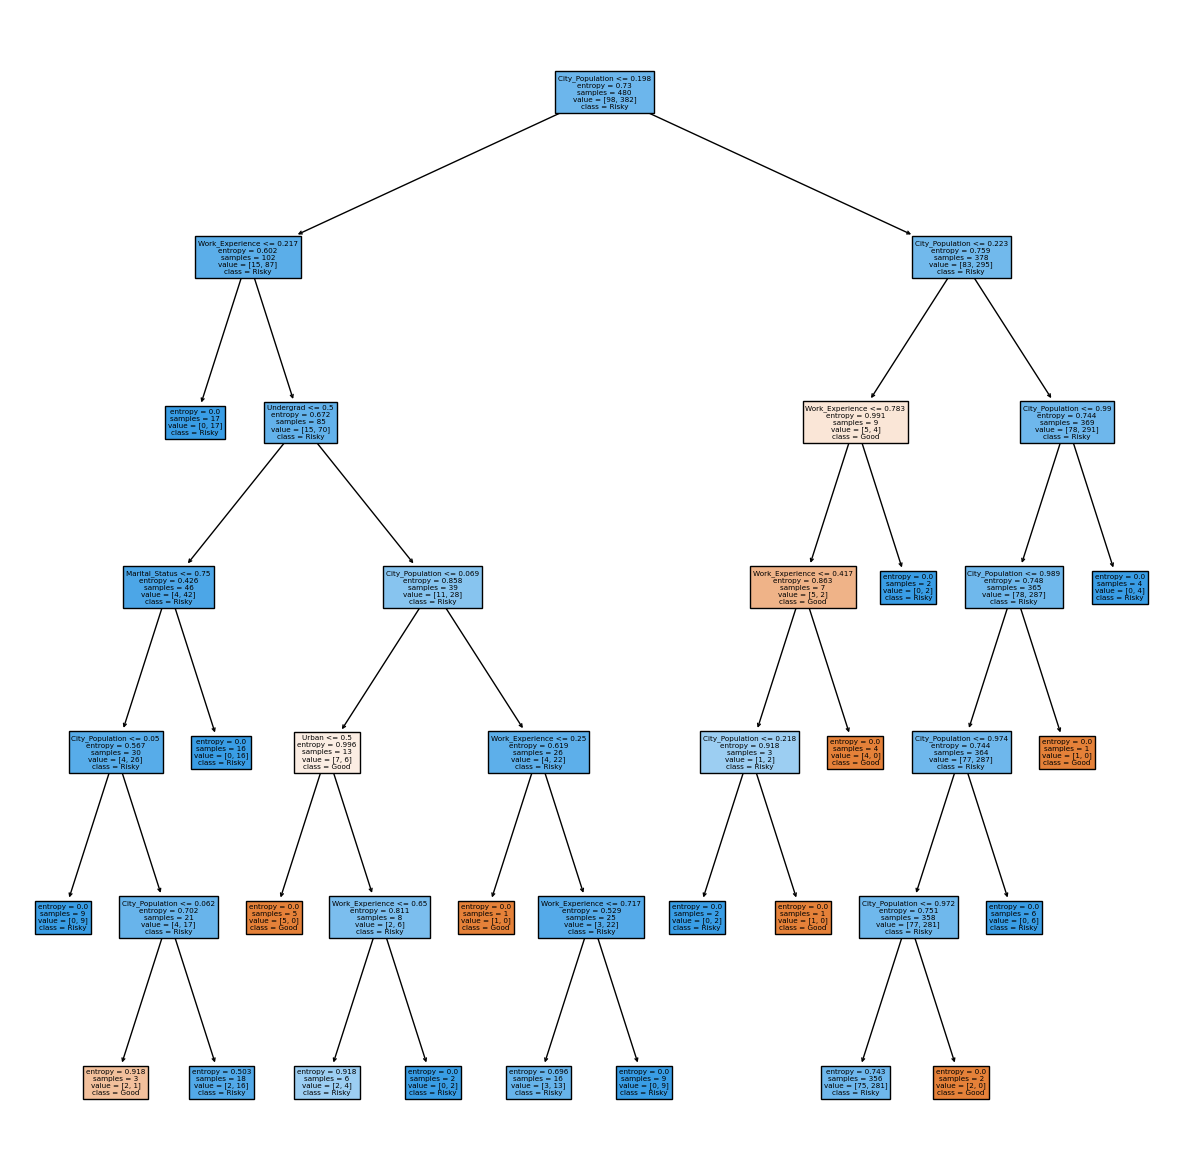

In [44]:
plt.figure(figsize=(15,15))
plot_tree(model, class_names=cnames, feature_names=features, filled=True)

plt.show()

Decision Tree using Gini criterion (CRT)

In [45]:
clf=DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10, criterion='gini')

In [46]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10)

In [47]:
train_pred=clf.predict(X_train)

In [48]:
confusion_matrix(Y_train, train_pred)

array([[  7,  91],
       [  2, 380]])

In [49]:
print(classification_report(Y_train, train_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.07      0.13        98
         1.0       0.81      0.99      0.89       382

    accuracy                           0.81       480
   macro avg       0.79      0.53      0.51       480
weighted avg       0.80      0.81      0.74       480



In [50]:
#accuracy is 81%

In [51]:

accuracy_score(Y_train, train_pred)

0.80625

In [52]:
pred=clf.predict(X_test)

In [53]:
confusion_matrix(Y_test, pred)

array([[ 0, 26],
       [ 3, 91]])

In [54]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        26
         1.0       0.78      0.97      0.86        94

    accuracy                           0.76       120
   macro avg       0.39      0.48      0.43       120
weighted avg       0.61      0.76      0.68       120



In [55]:
#for testing data it give 76% accuracy.

Grid search cv

In [56]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

mod=DecisionTreeClassifier()

param_grid = [{'max_depth':[3,4,5,6,7],'criterion':['gini','entropy'], 'max_leaf_nodes':[5,6,7,8] }]
gsv=GridSearchCV(mod,param_grid, cv=10, verbose=300)


In [57]:
gsv.fit(X_train, Y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10; 1/40] START criterion=gini, max_depth=3, max_leaf_nodes=5.............
[CV 1/10; 1/40] END criterion=gini, max_depth=3, max_leaf_nodes=5;, score=0.792 total time=   0.0s
[CV 2/10; 1/40] START criterion=gini, max_depth=3, max_leaf_nodes=5.............
[CV 2/10; 1/40] END criterion=gini, max_depth=3, max_leaf_nodes=5;, score=0.792 total time=   0.0s
[CV 3/10; 1/40] START criterion=gini, max_depth=3, max_leaf_nodes=5.............
[CV 3/10; 1/40] END criterion=gini, max_depth=3, max_leaf_nodes=5;, score=0.771 total time=   0.0s
[CV 4/10; 1/40] START criterion=gini, max_depth=3, max_leaf_nodes=5.............
[CV 4/10; 1/40] END criterion=gini, max_depth=3, max_leaf_nodes=5;, score=0.792 total time=   0.0s
[CV 5/10; 1/40] START criterion=gini, max_depth=3, max_leaf_nodes=5.............
[CV 5/10; 1/40] END criterion=gini, max_depth=3, max_leaf_nodes=5;, score=0.771 total time=   0.0s
[CV 6/10; 1/40] START criterion=gini,

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [3, 4, 5, 6, 7],
                          'max_leaf_nodes': [5, 6, 7, 8]}],
             verbose=300)

In [58]:
gsv.best_params_, gsv.best_score_

({'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 6}, 0.7875)

In [59]:
#Let us build our model with these parameters

In [60]:
clf_new=DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, criterion='gini')

In [61]:
clf_new.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6)

In [62]:
train_pred1=clf.predict(X_train) #prediction for X training data can be taken as y^

In [63]:
confusion_matrix(Y_train, train_pred1)

array([[  7,  91],
       [  2, 380]])

In [64]:
print(classification_report(Y_train, train_pred1))

              precision    recall  f1-score   support

         0.0       0.78      0.07      0.13        98
         1.0       0.81      0.99      0.89       382

    accuracy                           0.81       480
   macro avg       0.79      0.53      0.51       480
weighted avg       0.80      0.81      0.74       480



In [65]:
#accuracy is 81%

In [66]:
test_pred1=clf.predict(X_test)

In [67]:
confusion_matrix(Y_test, test_pred1)

array([[ 0, 26],
       [ 3, 91]])

In [68]:
print(classification_report(Y_test, test_pred1))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        26
         1.0       0.78      0.97      0.86        94

    accuracy                           0.76       120
   macro avg       0.39      0.48      0.43       120
weighted avg       0.61      0.76      0.68       120



In [69]:
#accuracy is 76% for testing data

In [70]:
#Vizualization

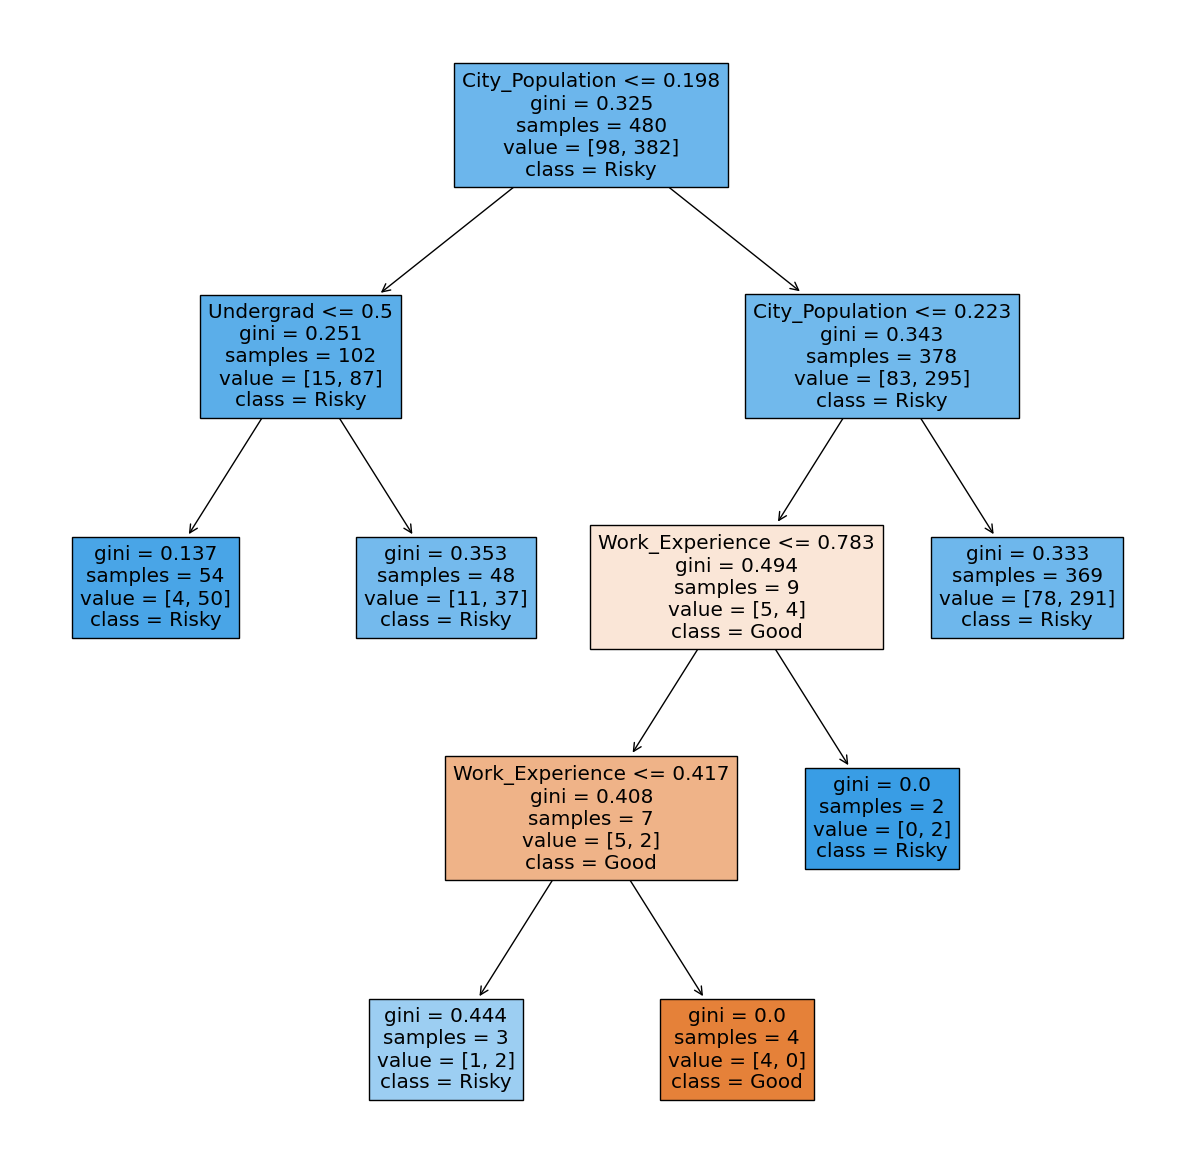

In [71]:
plt.figure(figsize=(15,15))
plot_tree(clf_new, class_names=cnames, feature_names=features, filled=True)

plt.show()

RANDOMFOREST

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [73]:
#let us use gridsearchCv and confirm the values
modd=RandomForestClassifier()
param_grid=[{'n_estimators':[80,90,100,200], 'max_features':[2,3,4,5,6]}]
gsv1=GridSearchCV(modd, param_grid, cv=10, verbose=100)

In [74]:
gsv1.fit(X_train, Y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 1/10; 1/20] END max_features=2, n_estimators=80;, score=0.771 total time=   0.2s
[CV 2/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 2/10; 1/20] END max_features=2, n_estimators=80;, score=0.792 total time=   0.2s
[CV 3/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 3/10; 1/20] END max_features=2, n_estimators=80;, score=0.750 total time=   0.3s
[CV 4/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 4/10; 1/20] END max_features=2, n_estimators=80;, score=0.729 total time=   0.3s
[CV 5/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 5/10; 1/20] END max_features=2, n_estimators=80;, score=0.688 total time=   0.3s
[CV 6/10; 1/20] START max_features=2, n_estimators=80...........................
[CV 6/10; 1/20] END max_fe

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 3, 4, 5, 6],
                          'n_estimators': [80, 90, 100, 200]}],
             verbose=100)

In [75]:
gsv1.best_params_, gsv1.best_score_

({'max_features': 3, 'n_estimators': 200}, 0.7541666666666667)

In [76]:
#let us build RandomForest model with these parameters

In [77]:
model_rf=RandomForestClassifier(n_estimators=80, max_features=3)
model_rf.fit(X_train, Y_train)


RandomForestClassifier(max_features=3, n_estimators=80)

In [78]:
kfold=KFold(n_splits=10, random_state=7, shuffle=True)

In [79]:
results=cross_val_score(model_rf, X, Y, cv=kfold)
print(results.mean())

0.7416666666666667


In [80]:
tr_pred=model_rf.predict(X_train)

In [81]:
confusion_matrix(Y_train, tr_pred)
#only 1 miss classification

array([[ 98,   0],
       [  0, 382]])

In [82]:
print(classification_report(Y_train, tr_pred))
#accuracy is very high

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        98
         1.0       1.00      1.00      1.00       382

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [83]:
accuracy_score(Y_train, tr_pred)   ###we have 99.79% accuracy for our training data

1.0

In [84]:
te_pred=model_rf.predict(X_test)
confusion_matrix(Y_test, te_pred)
#we have 29 miss classification

array([[ 0, 26],
       [ 3, 91]])

In [85]:
print(classification_report(Y_test, te_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        26
         1.0       0.78      0.97      0.86        94

    accuracy                           0.76       120
   macro avg       0.39      0.48      0.43       120
weighted avg       0.61      0.76      0.68       120



In [86]:
accuracy_score(Y_test, te_pred)

0.7583333333333333

In [87]:
#accuracy for testing data is 75%